In [23]:
#Setup
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
cc_data = pd.read_csv("/Users/sarakleine-kracht/Desktop/Project_1_Group_3/cc_data.csv")
cc_data.head()

,Unnamed: 0,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,merch_lat,merch_long,gender
0,527442,2020-09-12 04:29:58,shopping_net,4.94,Darien,GA,31.3826,-81.4312,5989,1967-05-05,32.260016,-81.794484,F
1,538511,2020-09-17 18:28:09,shopping_pos,4.38,Mill Creek,PA,40.4679,-77.8967,1334,1986-12-17,39.472619,-78.244576,F
2,37539,2019-04-14 17:46:09,home,55.26,Centerview,MO,38.7897,-93.8702,2368,1989-07-17,39.199107,-93.423308,NaN
3,350429,2020-06-25 16:26:23,kids_pets,48.95,Indianapolis,IN,39.8490,-86.2720,910148,1975-11-30,39.685401,-87.064198,F
4,561460,2020-09-29 17:18:42,shopping_pos,348.15,Wilmington,NC,34.2651,-77.8670,186140,1983-02-08,34.268060,-78.504405,F


Fraudulent Transaction Category Analysis

In [25]:
base_category = pd.DataFrame(cc_data["category"].value_counts())
base_category_df = base_category.rename(index= {'gas_transport': 'Gas and Transport', 'home': 'Home', 'grocery_pos': 'Grocery (In Store)', 'shopping_pos': "Shopping (In Store)", 'kids_pets': 'Kids and Pets', 'entertainment': 'Entertainment', 'health_fitness': 'Health and Fitness', 'personal_care': 'Personal Care', 'food_dining': 'Food and Dining', 'shopping_net': 'Shopping (Online)', 'misc_pos': 'Misc (In Store)', 'misc_net': 'Misc (Online)', 'grocery_net': 'Grocery (Online)', 'travel': 'Travel'})
base_category_df

,count
category,
Gas and Transport,1002
Home,988
Shopping (In Store),928
Kids and Pets,899
Grocery (In Store),886
Entertainment,731
Shopping (Online),729
Food and Dining,716
Personal Care,679


The category with the highest number of fraudulent transactions is gas and transport with 1,002 transactions. The category with the lowest number of fraudulent transactions is Travel with 319 transactions.

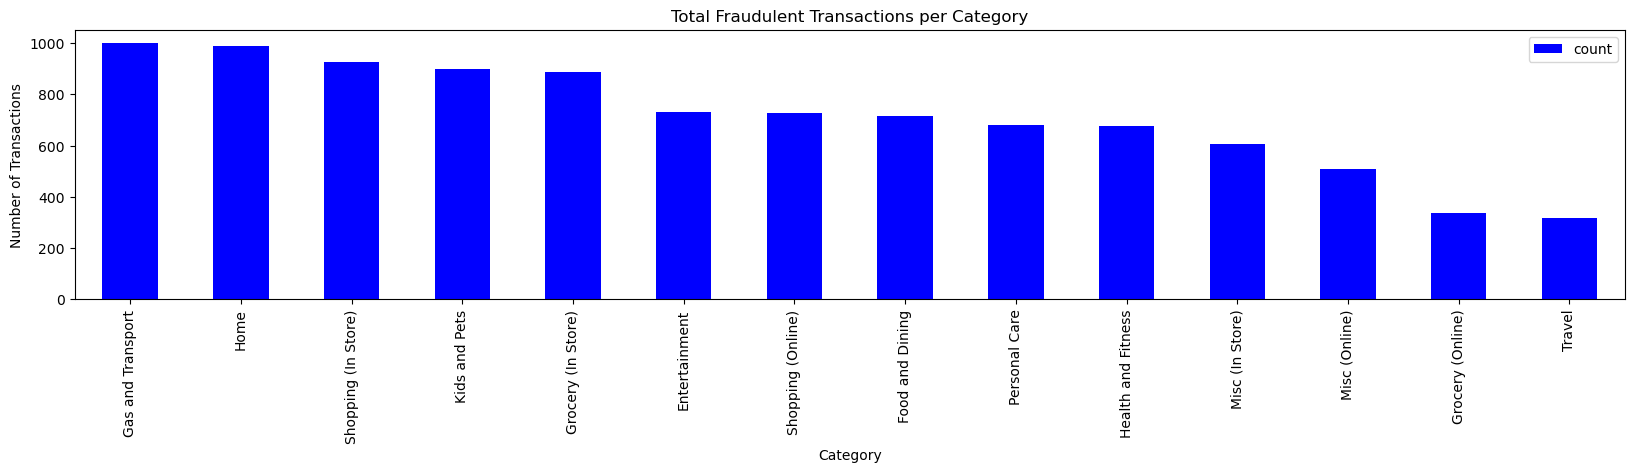

<Figure size 640x480 with 0 Axes>

In [26]:

category_bar = base_category_df.plot(kind="bar", color= 'b', figsize=(20,3.5))
plt.title("Total Fraudulent Transactions per Category")
plt.xlabel("Category")
plt.ylabel("Number of Transactions")
plt.show()
plt.tight_layout()

In [27]:
grouped_category_df = cc_data.groupby(["category"])
grouped_category_df.head(20)

,Unnamed: 0,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,merch_lat,merch_long,gender
0,527442,2020-09-12 04:29:58,shopping_net,4.94,Darien,GA,31.3826,-81.4312,5989,1967-05-05,32.260016,-81.794484,F
1,538511,2020-09-17 18:28:09,shopping_pos,4.38,Mill Creek,PA,40.4679,-77.8967,1334,1986-12-17,39.472619,-78.244576,F
2,37539,2019-04-14 17:46:09,home,55.26,Centerview,MO,38.7897,-93.8702,2368,1989-07-17,39.199107,-93.423308,NaN
3,350429,2020-06-25 16:26:23,kids_pets,48.95,Indianapolis,IN,39.8490,-86.2720,910148,1975-11-30,39.685401,-87.064198,F
4,561460,2020-09-29 17:18:42,shopping_pos,348.15,Wilmington,NC,34.2651,-77.8670,186140,1983-02-08,34.268060,-78.504405,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,169451,2019-12-30 22:42:10,travel,6.82,Meredith,CO,39.3199,-106.6596,61,1939-11-04,40.175680,-106.515999,NaN
453,351641,2020-06-26 09:23:27,grocery_net,48.50,Lanark Village,FL,29.8826,-84.5964,217,1990-01-24,29.028554,-84.619250,F
455,331216,2020-12-21 19:02:33,travel,6.24,Freedom,WY,43.0172,-111.0292,471,1967-08-02,42.661155,-111.288003,M
501,663852,2020-11-23 21:57:39,travel,465.44,Acworth,NH,43.1960,-72.3001,477,1988-04-15,43.737342,-72.843261,M


In [28]:
category_amt = grouped_category_df['amt'].sum()
cleaned_category_amt = category_amt.rename(index= {'gas_transport': 'Gas and Transport', 'home': 'Home', 'grocery_pos': 'Grocery (In Store)', 'shopping_pos': "Shopping (In Store)", 'kids_pets': 'Kids and Pets', 'entertainment': 'Entertainment', 'health_fitness': 'Health and Fitness', 'personal_care': 'Personal Care', 'food_dining': 'Food and Dining', 'shopping_net': 'Shopping (Online)', 'misc_pos': 'Misc (In Store)', 'misc_net': 'Misc (Online)', 'grocery_net': 'Grocery (Online)', 'travel': 'Travel'})
cleaned_category_amt

category
Entertainment           48623.11
Food and Dining         35648.18
Gas and Transport       64201.20
Grocery (Online)        17783.95
Grocery (In Store)     106739.13
Health and Fitness      35715.38
Home                    59137.60
Kids and Pets           51577.50
Misc (Online)           42392.47
Misc (In Store)         40550.04
Personal Care           33331.41
Shopping (Online)       57975.29
Shopping (In Store)     67905.99
Travel                  30210.79
Name: amt, dtype: float64

The Grocery (In Store) category had the highest total loss in dollars with $106,739.13. The Grocery (Online) category had the lowest total loss in dollars with $17,783.95.

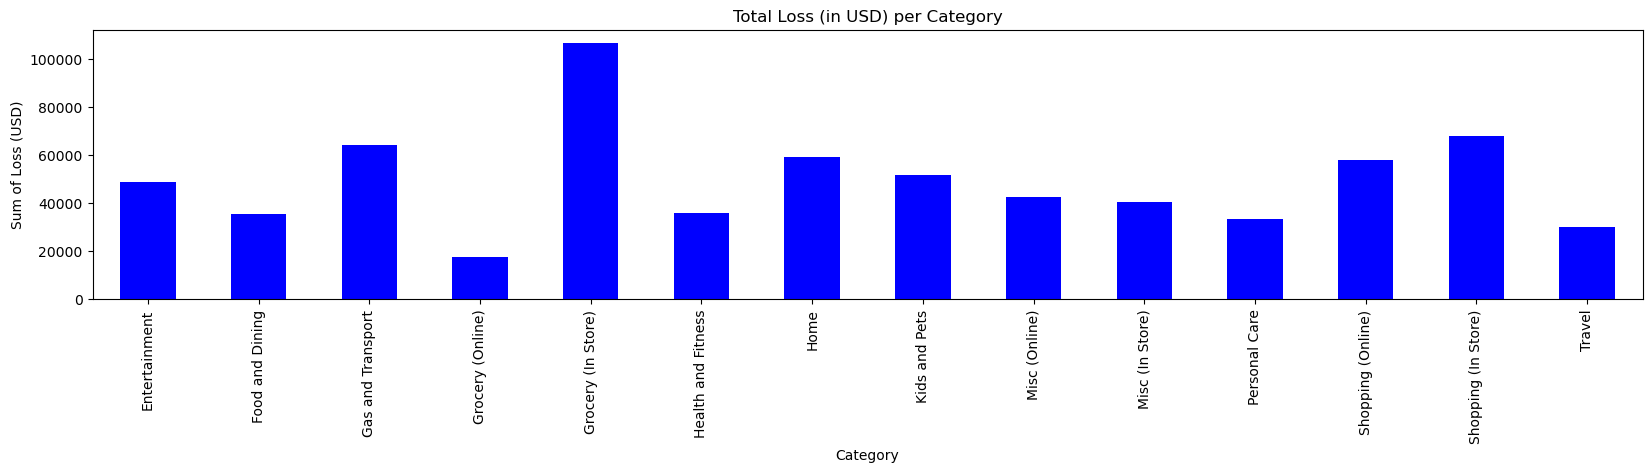

<Figure size 640x480 with 0 Axes>

In [29]:
category_totals_bar = cleaned_category_amt.plot(kind="bar", color= 'b', figsize=(20,3.5))
plt.title("Total Loss (in USD) per Category")
plt.xlabel("Category")
plt.ylabel("Sum of Loss (USD)")
plt.show()
plt.tight_layout()